In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Function to load the dataset
def load_dataset(prefix, features, folder_name):
    # Load the dataset as a pandas DataFrame
    X = pd.read_csv(prefix + 'X_' + folder_name + '.txt', delim_whitespace=True, header=None)
    y = pd.read_csv(prefix + 'y_' + folder_name + '.txt', delim_whitespace=True, header=None)
    subjects = pd.read_csv(prefix + 'subject_' + folder_name + '.txt', delim_whitespace=True, header=None)

    # Combine the dataset
    df = pd.concat([X, y, subjects], axis=1)
    return df

# Load features names
features = pd.read_csv('../UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)

# Load training and test data
train_df = load_dataset('../UCI HAR Dataset/train/', features, "train")
test_df = load_dataset('../UCI HAR Dataset/test/', features, "test")

# Combine train and test data (if necessary)
full_df = pd.concat([train_df, test_df])


In [26]:
full_df.columns = list(features[1]) + ['activity'] + ['subject']

In [28]:
full_df.to_csv('../UCI HAR Dataset/combined_data.csv', index=False)

In [ ]:
# import combined data
data = pd.read_csv('../UCI HAR Dataset/combined_data.csv')
# head of the data
data.head()

In [4]:
# column names
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'activity', 'subject'],
      dtype='object', length=563)

In [24]:
#rename the column angle(tBodyAccJerkMean),gravityMean)
data.rename(columns={'angle(tBodyAccJerkMean),gravityMean)':'angle(tBodyAccJerkMean,gravityMean)'}, inplace=True)

In [25]:
# summary statitics
summary_stats = data.describe()
summary_stats

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity,subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,3.624624,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,1.743695,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,2.000000,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,4.000000,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,5.000000,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,30.000000


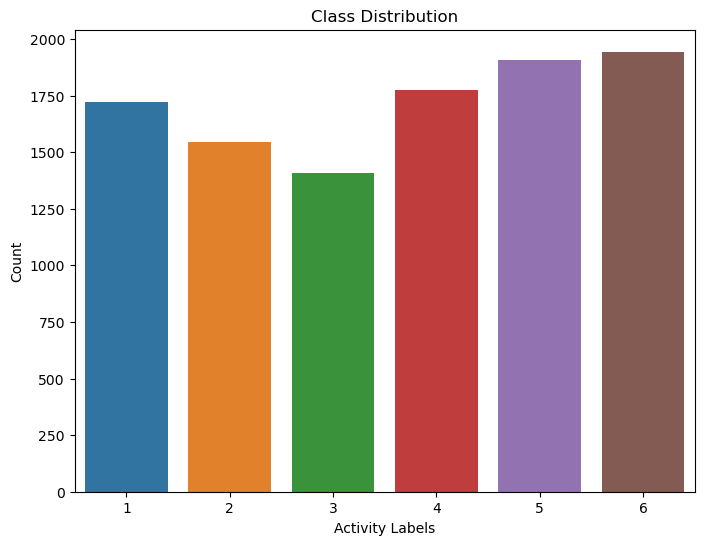

In [9]:
# Class Distribution
class_distribution = data['activity'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='activity', data=data)
plt.title('Class Distribution')
plt.xlabel('Activity Labels')
plt.ylabel('Count')
plt.show()

In [ ]:
# subject distrbution
subject_distribution = data['subject'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='subject', data=data)
plt.title('subject Distribution')
plt.xlabel('subject Labels')
plt.ylabel('Count')
plt.show()

<Axes: >

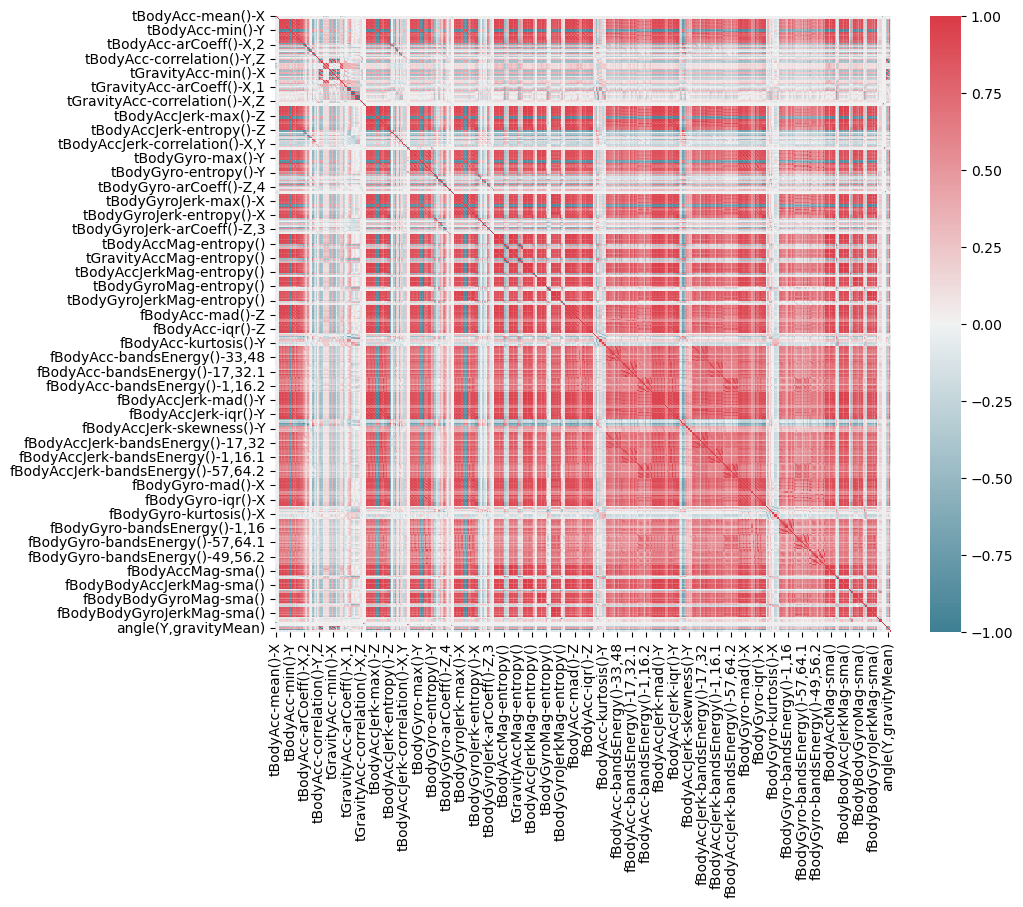

In [ ]:
# 
f, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)


In [33]:
#sns.pairplot(data)

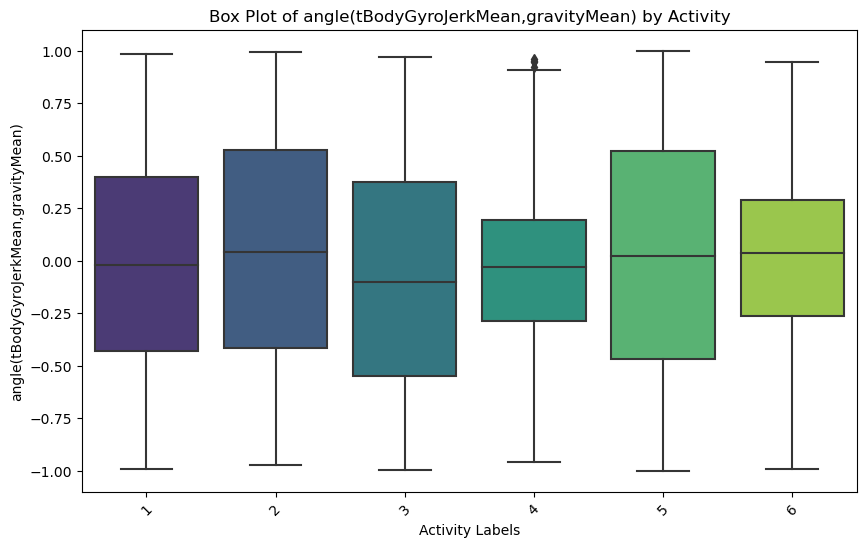

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='angle(tBodyGyroJerkMean,gravityMean)', data=data, palette='viridis')
plt.title('Box Plot of angle(tBodyGyroJerkMean,gravityMean) by Activity')
plt.xlabel('Activity Labels')
plt.ylabel('angle(tBodyGyroJerkMean,gravityMean)')
plt.xticks(rotation=45)
plt.show()


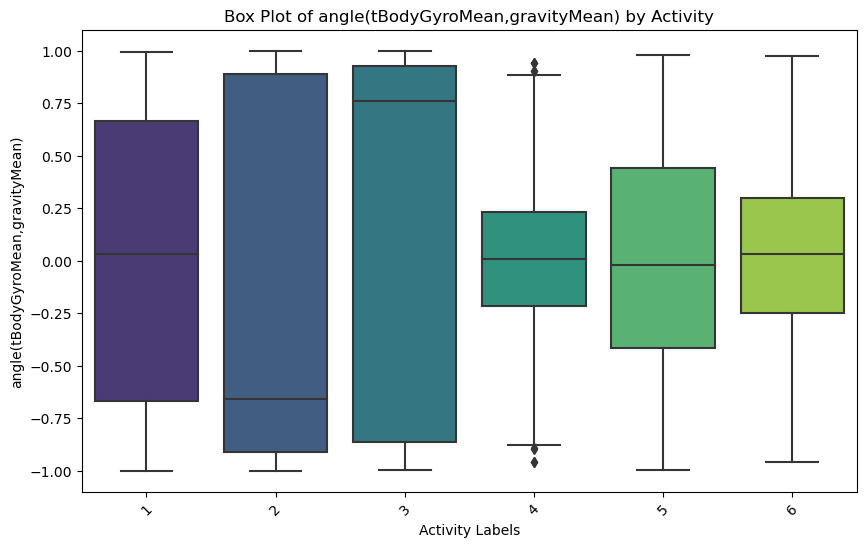

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='angle(tBodyGyroMean,gravityMean)', data=data, palette='viridis')
plt.title('Box Plot of angle(tBodyGyroMean,gravityMean) by Activity')
plt.xlabel('Activity Labels')
plt.ylabel('angle(tBodyGyroMean,gravityMean)')
plt.xticks(rotation=45)
plt.show()


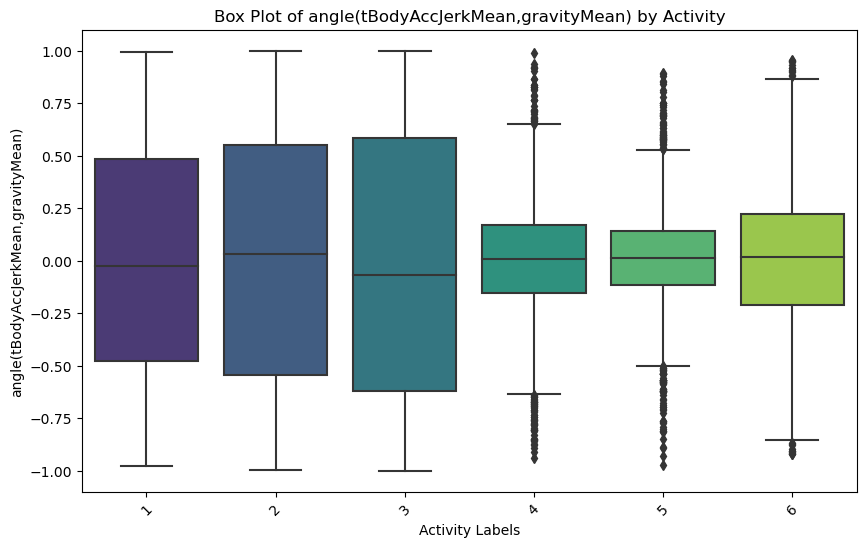

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='angle(tBodyAccJerkMean,gravityMean)', data=data, palette='viridis')
plt.title('Box Plot of angle(tBodyAccJerkMean,gravityMean) by Activity')
plt.xlabel('Activity Labels')
plt.ylabel('angle(tBodyAccJerkMean,gravityMean)')
plt.xticks(rotation=45)
plt.show()


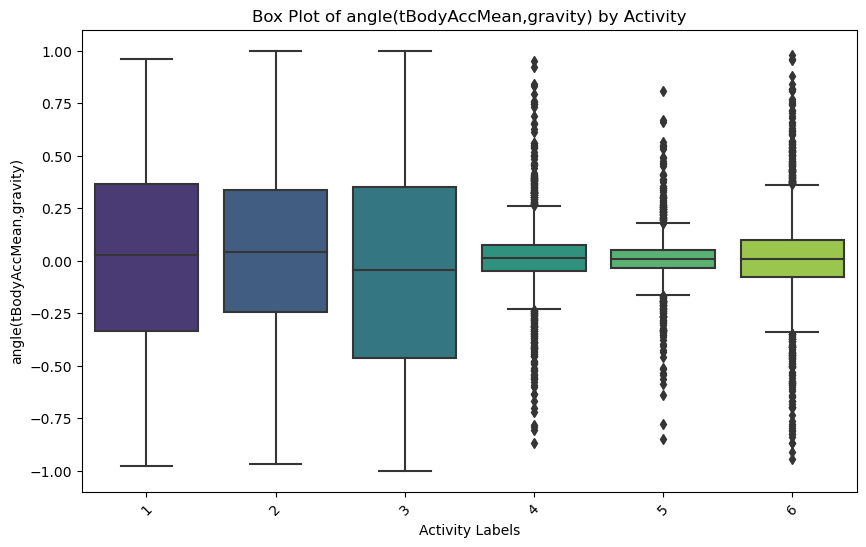

In [27]:

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='angle(tBodyAccMean,gravity)', data=data, palette='viridis')
plt.title('Box Plot of angle(tBodyAccMean,gravity) by Activity')
plt.xlabel('Activity Labels')
plt.ylabel('angle(tBodyAccMean,gravity)')
plt.xticks(rotation=45)
plt.show()

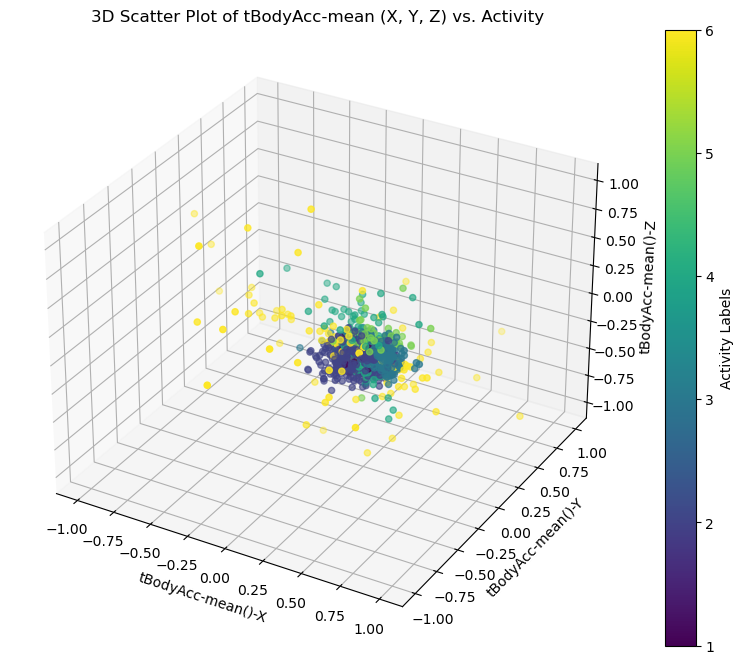

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the relevant columns
angles_x = data['tBodyAcc-mean()-X']
angles_y = data['tBodyAcc-mean()-Y']
angles_z = data['tBodyAcc-mean()-Z']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coding based on activity labels
scatter = ax.scatter(angles_x, angles_y, angles_z, c=data['activity'], cmap='viridis')

# Add labels and title
ax.set_xlabel('tBodyAcc-mean()-X')
ax.set_ylabel('tBodyAcc-mean()-Y')
ax.set_zlabel('tBodyAcc-mean()-Z')
ax.set_title('3D Scatter Plot of tBodyAcc-mean (X, Y, Z) vs. Activity')

# Add color bar to represent activity labels
colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Activity Labels')

plt.show()


In [ ]:
# Extract the relevant columns
angles_x = data['angle(X,gravityMean)']
angles_y = data['angle(Y,gravityMean)']
angles_z = data['angle(Z,gravityMean)']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coding based on activity labels
scatter = ax.scatter(angles_x, angles_y, angles_z, c=data['activity'], cmap='viridis')

# Add labels and title
ax.set_xlabel('Angle(X,gravityMean)')
ax.set_ylabel('Angle(Y,gravityMean)')
ax.set_zlabel('Angle(Z,gravityMean)')
ax.set_title('3D Scatter Plot of Angles (X, Y, Z) vs. Activity')

# Add color bar to represent activity labels
colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Activity Labels')

plt.show()